In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver3D as s3

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh = IntervalMesh(20, 0, 1)

In [3]:
mesh.coordinates().shape

(21, 1)

iter=1: norm=7.90254e-06
Solving linear variational problem.
21
21
21
21
21
21
21
21
21
a (189, 189)
(189, 189)
(189, 1)
[3.92502552e-05 3.92455717e-05 3.92434213e-05 3.92415811e-05
 3.92407819e-05 3.92395454e-05 3.92396809e-05 3.92372731e-05
 3.92391848e-05 3.92447911e-05 3.92470746e-05 3.92447911e-05
 3.92391848e-05 3.92372731e-05 3.92396809e-05 3.92395454e-05
 3.92407819e-05 3.92415811e-05 3.92434213e-05 3.92455717e-05
 3.92502552e-05 3.05764380e-04 3.05764909e-04 3.05765481e-04
 3.05765930e-04 3.05765980e-04 3.05766175e-04 3.05769241e-04
 3.05770345e-04 3.05769211e-04 3.05771821e-04 3.05778607e-04
 3.05771821e-04 3.05769211e-04 3.05770345e-04 3.05769240e-04
 3.05766175e-04 3.05765980e-04 3.05765930e-04 3.05765481e-04
 3.05764909e-04]
[[0.  ]
 [0.05]
 [0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]
 [0.4 ]
 [0.45]
 [0.5 ]
 [0.55]
 [0.6 ]
 [0.65]
 [0.7 ]
 [0.75]
 [0.8 ]
 [0.85]
 [0.9 ]
 [0.95]
 [1.  ]]


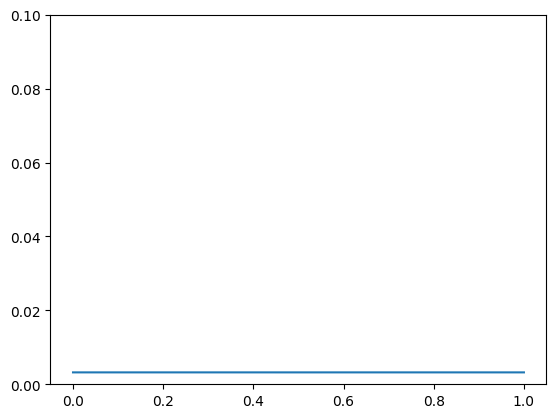

In [4]:
m0 = 1e-3
dt = 0.5
T = 150
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/test"

solver = s3.Solver3D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
mass = solver.solve()

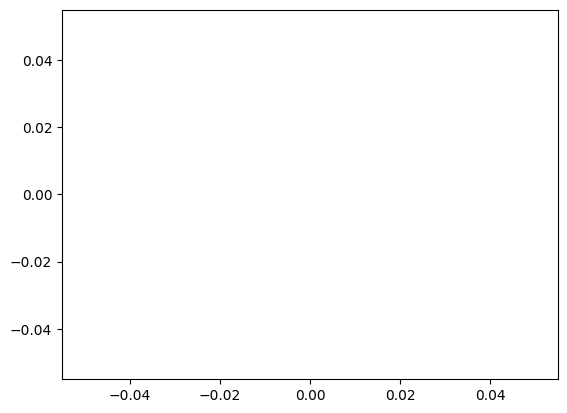

In [5]:
# mass = np.load('solutions/test/mass.npy')
plt.plot(mass)

In [6]:
class VerticalAverage(UserExpression):
    def __init__(self, f, quad_degree, **kwargs):
        super().__init__(**kwargs)
        self.f = f
        self.points, self.weights = leggauss(quad_degree)
        self.x = 0.5*(self.points + 1)
        assert f.ufl_shape == ()
        
    def eval(self, values, x):
        values[0] = 0.5*sum(wq*self.f(x[0], xq) for xq, wq in zip(self.x, self.weights))

    def value_shape(self):
        return ()
    
mesh2D = UnitSquareMesh(10,10)
V2D = FunctionSpace(mesh2D, "CG", 1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[1]-s0,2)/(2*sigma*sigma))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=1)
phi = VerticalAverage(n0, 10, degree=1)
phi = interpolate(phi, V1D)
plot(phi)

NameError: name 'V1D' is not defined

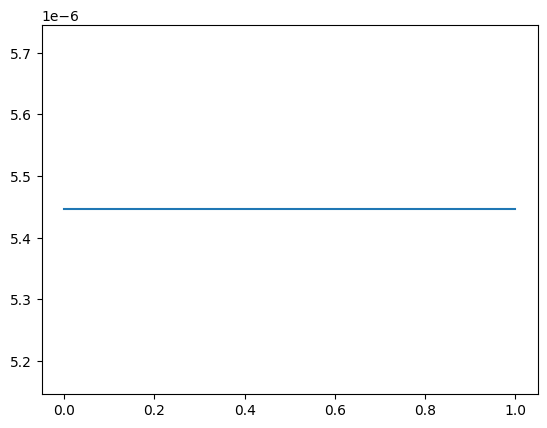

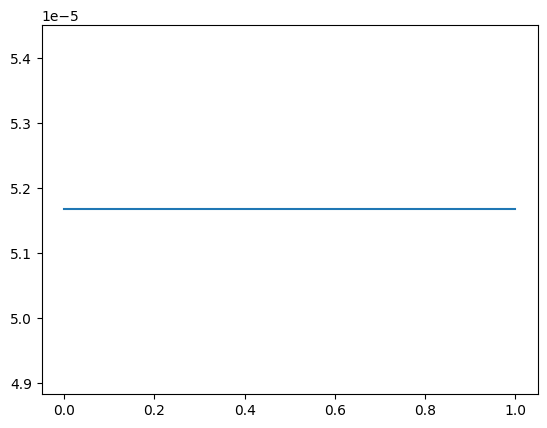

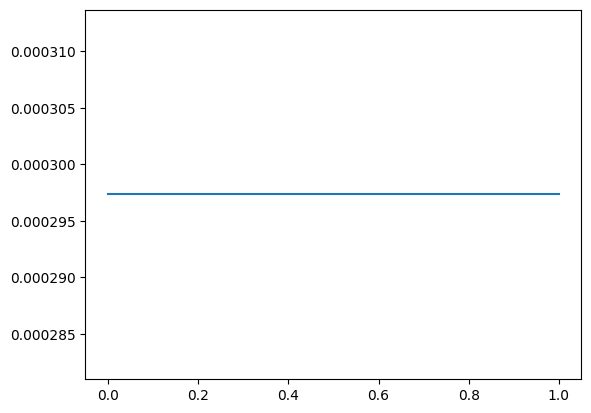

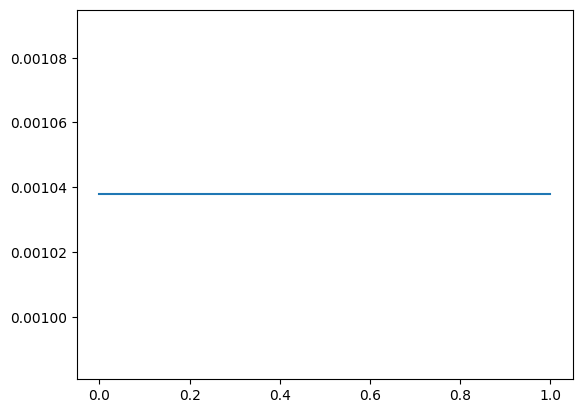

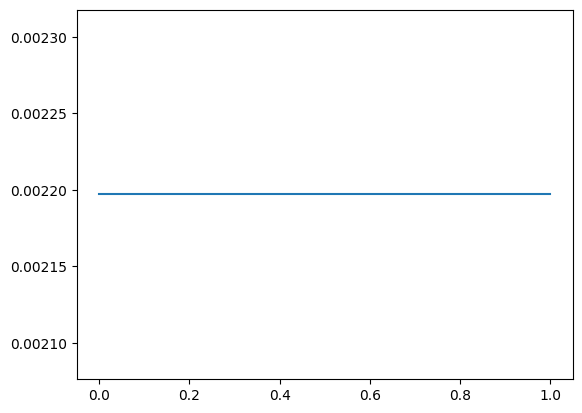

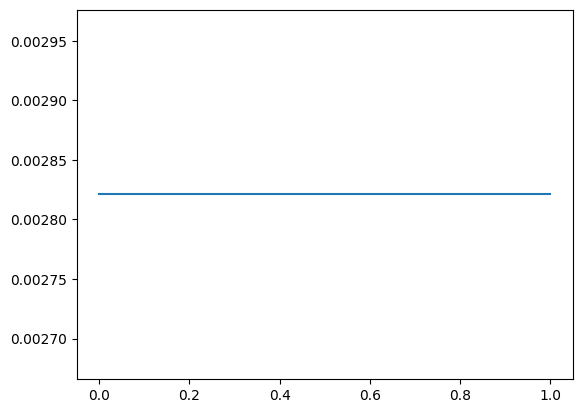

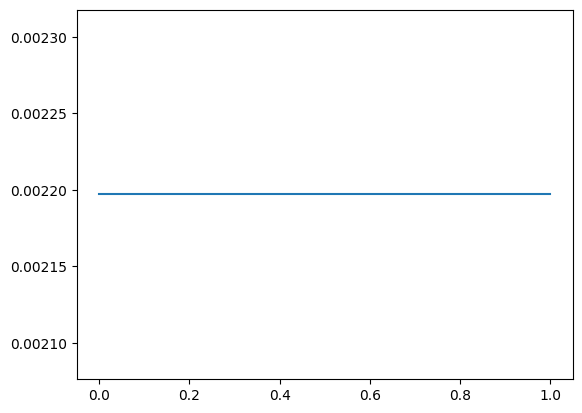

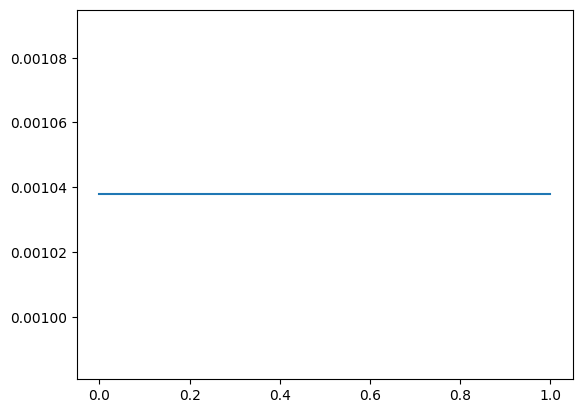

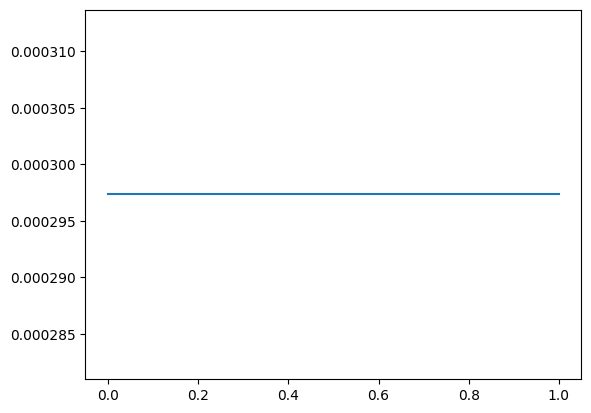

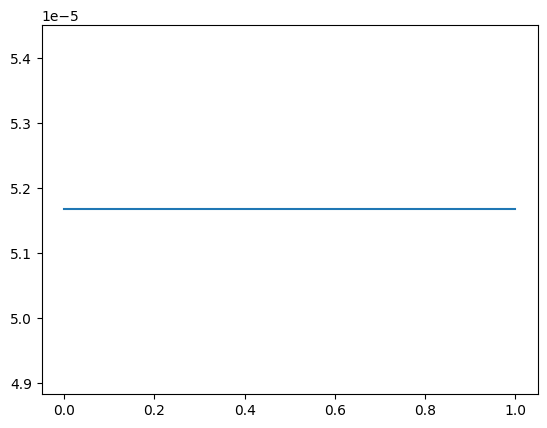

In [ ]:
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),s=0,degree=1)
for i in range(10):
    temp = Function(V)
    n0.s = i*0.1
    temp.assign(n0)
    temp = interpolate(temp, V)
    plot(temp)
    plt.show()

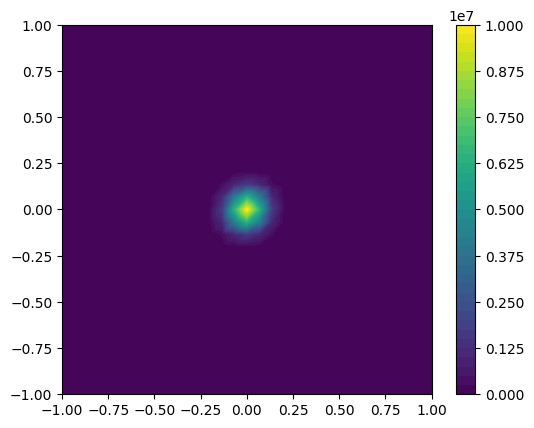

In [ ]:
mesh = RectangleMesh(Point(-1, -1), Point(1, 1), 30, 30)
V = FunctionSpace(mesh, "CG", 1)
Vc = Expression('1e7*exp(-x[0]*x[0]/(sigma_v*sigma_v)- x[1]*x[1]/(sigma_v*sigma_v))',sigma_v = 0.1,degree=2)
Vc = interpolate(Vc, V)
plot(Vc)
plt.colorbar(plot(Vc))